# Imports

In [1]:
import tensorflow as tf

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

### Imporing MNIST Dataset

In [4]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### Exploring MNIST Data

In [6]:
print(dir(mnist))

['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '_asdict', '_fields', '_make', '_replace', '_source', 'count', 'index', 'test', 'train', 'validation']


'test', 'train', 'validation'

In [7]:
print(dir(mnist.train))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_epochs_completed', '_images', '_index_in_epoch', '_labels', '_num_examples', 'epochs_completed', 'images', 'labels', 'next_batch', 'num_examples']


'epochs_completed', 'images', 'labels', 'next_batch', 'num_examples'

In [8]:
mnist.train.num_examples

55000

In [9]:
mnist.test.num_examples

10000

In [10]:
mnist.test.num_examples

10000

---

In [11]:
random_index = np.random.randint(0, mnist.train.num_examples)

In [12]:
mnist.train.labels[random_index]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.])

From the one hot label, image is 9

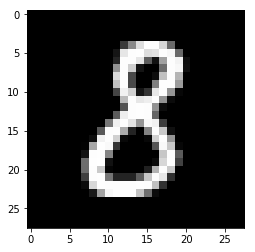

In [13]:
plt.imshow(mnist.train.images[random_index].reshape(28, 28), cmap='gist_gray')

---

---

# Training a model

y = xW + b

#### Placeholders

In [14]:
x = tf.placeholder(tf.float32, shape=[None, 784])

In [15]:
y = tf.placeholder(tf.float32, shape=[None, 10])

#### Variables

In [16]:
W = tf.Variable(tf.zeros([784, 10]))

In [17]:
b = tf.Variable(tf.zeros([10]))

#### Graph Operation

In [18]:
y_hat = tf.add(tf.matmul(x, W), b)

#### Loss Function

In [19]:
cross_entropy = \
tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(\
      labels=y, logits=y_hat))

In [20]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [21]:
train = optimizer.minimize(cross_entropy)

#### Session

In [22]:
init = tf.global_variables_initializer()

In [40]:
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(10000):
        batch_x, batch_y = mnist.train.next_batch(100)
        
        sess.run(train, feed_dict={x: batch_x, y: batch_y})
        
        if step%1000 == 0:
            # Evaluate model
            correct_prediction = tf.equal(tf.argmax(y_hat, 1),\
                                      tf.argmax(y, 1))

            acc = tf.reduce_mean(tf.cast(correct_prediction, \
                                         tf.float32))
            result = sess.run(acc,\
              feed_dict={x:mnist.test.images,\
                         y:mnist.test.labels})

            print('[@ Step {0}] Accuracy: {1:.3f}'.format(step, result))

[@ Step 0] Accuracy: 0.293
[@ Step 1000] Accuracy: 0.916
[@ Step 2000] Accuracy: 0.919
[@ Step 3000] Accuracy: 0.923
[@ Step 4000] Accuracy: 0.922
[@ Step 5000] Accuracy: 0.922
[@ Step 6000] Accuracy: 0.924
[@ Step 7000] Accuracy: 0.923
[@ Step 8000] Accuracy: 0.925
[@ Step 9000] Accuracy: 0.923
